# PowerCo ,

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option("display.max_columns" , None)

In [67]:
client = pd.read_csv("/Users/kamalroshan/Desktop/BCG_Forage/client_data.csv")
price = pd.read_csv("/Users/kamalroshan/Desktop/BCG_Forage/price_data.csv")

## Understanding Data 

In [4]:
client.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [5]:
client.shape

(14606, 26)

In [6]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price.head(15)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.000000,0.000000,44.266930,0.000000,0.000000
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.000000,0.000000,44.444710,0.000000,0.000000
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000


In [8]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [9]:
price.shape

(193002, 8)

In [10]:
# checking for any duplicate rows
client.loc[client.duplicated()]

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


In [11]:
# Checking for any duplicate rows
price.loc[price.duplicated()]

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix


In [12]:
(client["channel_sales"] == 'MISSING').sum()

3725

In [13]:
# Some of the columns have lots of hashed text strings to hold data privacy of the company .
client = client.drop(['channel_sales','origin_up'] , axis = 1 )

In [14]:
# converting date columns from client dataframe into proper format
date_cols = ['date_activ','date_end','date_modif_prod','date_renewal']
for date in date_cols :
    client[date] = pd.to_datetime(client[date])

In [15]:
## converting date columns from price dataframe into proper format
price['price_date'] = pd.to_datetime(price['price_date'])

## Data Visualization

### **Customer Churn Rate**

In [16]:
# Customer churn rate in percentage %
churn=client[['id','churn']]
churn.columns=['Customer Rate','churn']
churn_total=churn.groupby(churn['churn']).count()
churn_percentage=churn_total/churn_total.sum()*100

In [17]:
churn_percentage

,Customer Rate
churn,
0,90.284814
1,9.715186


In [18]:
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

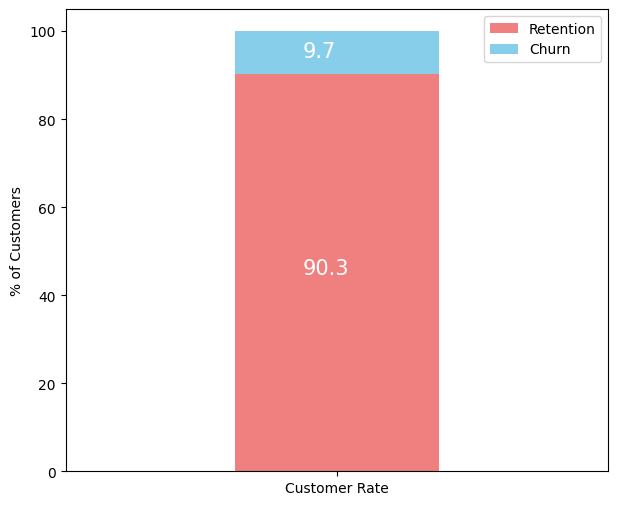

In [19]:
ax=churn_percentage.transpose().plot(kind='bar',stacked=True,figsize=(7,6),rot=0 , width = 0.3 , color =['lightcoral','skyblue'])
annotate_stacked_bars(ax, textsize=15 )
plt.legend(['Retention','Churn'], loc = 'upper right')
plt.ylabel('% of Customers')
plt.show()

## Segmentation Of Dataframe

In [20]:
# For the ease of visualization , I am splitting the dataframe into two. 
client_churn = client[client['churn'] == 1]
client_retain = client[client['churn'] == 0]

In [21]:
client_retain.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,13.856,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,19.800,0
7,01495c955be7ec5e7f3203406785aae0,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,751,0.0,144.49,0.115174,0.098837,40.606701,f,70.63,53.92,53.92,1,100.09,6,26.400,0


### Outlier Analysis

In [22]:
# Retrieve all required numeric columns to perform outlier analysis
numeric_cols = client.select_dtypes(include=['number']).columns.tolist()

In [23]:
numeric_cols=['cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_off_peak',
 'forecast_price_energy_peak',
 'forecast_price_pow_off_peak',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'nb_prod_act',
 'net_margin',
 'num_years_antig',
 'pow_max',
 #'churn'
]

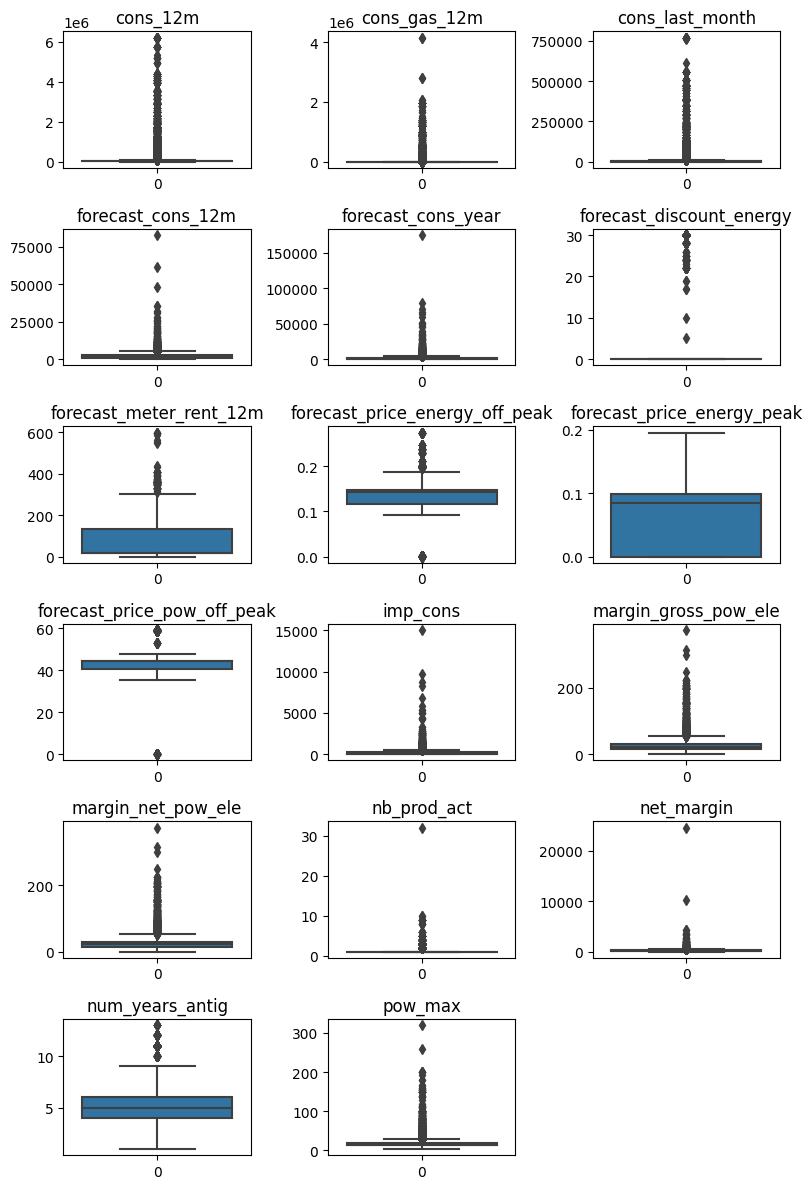

In [24]:
fig = plt.figure(figsize=(8,12))
for a , b in enumerate (numeric_cols) :
    ax = fig.add_subplot(6,3,a+1)
    sns.boxplot(data=client[b],ax=ax)
    ax.set_title(b)
plt.tight_layout()
plt.show()

### Skewness of Data Distribution

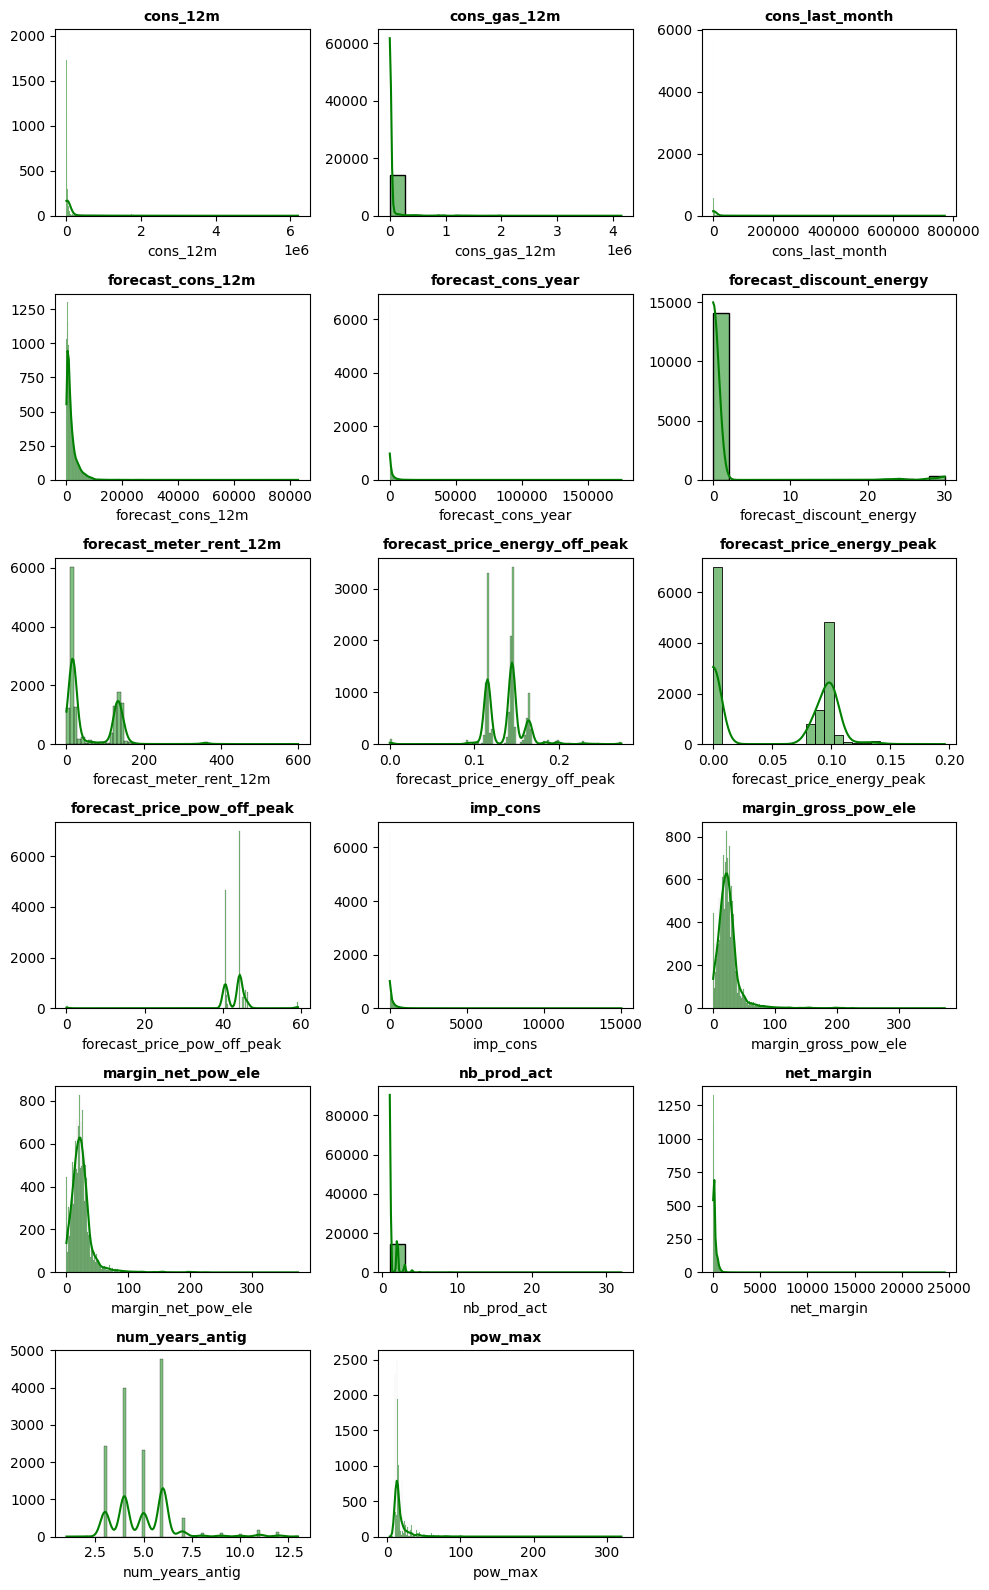

In [25]:
fig = plt.figure(figsize=(10,16))
for a , b in enumerate (numeric_cols) :
    ax = fig.add_subplot(6,3,a+1)
    sns.histplot(data=client,x = b, ax=ax , kde = True , color = 'green')
    ax.set_title(b , fontweight = 'bold' , fontsize = 10)
    ax.set_ylabel('')
plt.tight_layout()
plt.show()

**NOTE :** Some of the variables under the client dataframe have significantly high number of outliers and a large % of the data is observed to be highly skewed 

## Univariate Analysis

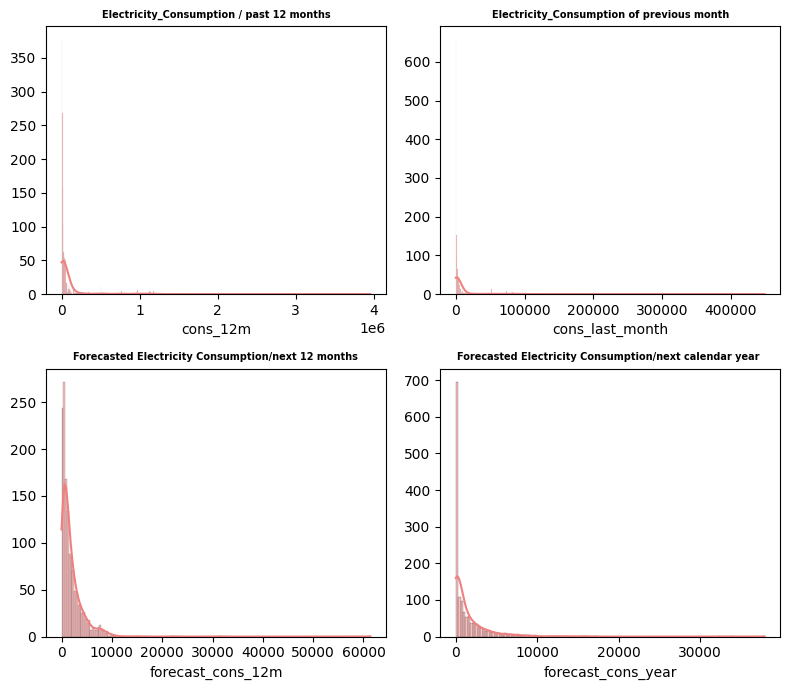

In [26]:
# plotting electricity consumption of the CHURNED customers
electricity_cols = ['cons_12m','cons_last_month','forecast_cons_12m','forecast_cons_year']
title = ['Electricity_Consumption / past 12 months' ,'Electricity_Consumption of previous month',
         'Forecasted Electricity Consumption/next 12 months' , 'Forecasted Electricity Consumption/next calendar year ']
fig = plt.figure(figsize=(8,7))
for a , b in enumerate (electricity_cols):
    ax = fig.add_subplot(2,2,a+1)
    sns.histplot(data=client_churn,x=b,ax=ax,kde=True , color = 'lightcoral')
    ax.set_title(title[a] , fontsize = 7 , fontweight = 'bold')
    ax.set_ylabel('')
plt.tight_layout()
plt.show()

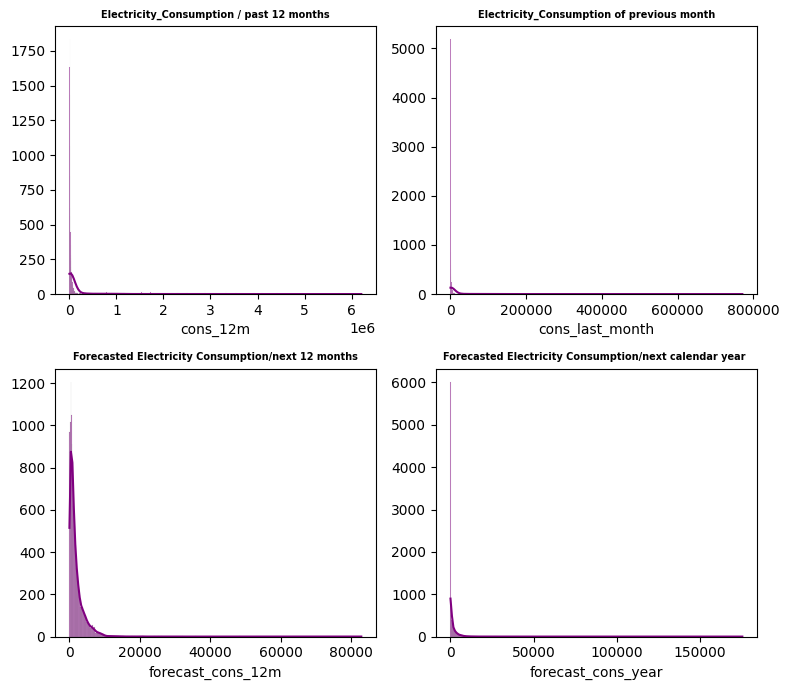

In [27]:
# plotting electricity consumption of the RETAINED customers
electricity_cols = ['cons_12m','cons_last_month','forecast_cons_12m','forecast_cons_year']
title = ['Electricity_Consumption / past 12 months' ,'Electricity_Consumption of previous month',
         'Forecasted Electricity Consumption/next 12 months' , 'Forecasted Electricity Consumption/next calendar year ']
fig = plt.figure(figsize=(8,7))
for a , b in enumerate (electricity_cols):
    ax = fig.add_subplot(2,2,a+1)
    sns.histplot(data=client_retain,x=b,ax=ax,kde=True , color = 'purple')
    ax.set_title(title[a] , fontsize = 7 , fontweight = 'bold')
    ax.set_ylabel('')
plt.tight_layout()
plt.show()

## Gas consumers 

In [28]:
client['has_gas'].value_counts()

has_gas
f    11955
t     2651
Name: count, dtype: int64

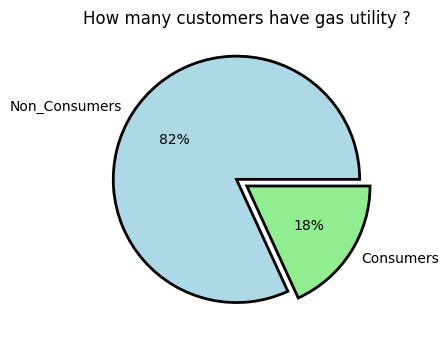

In [33]:
x = client['has_gas'].value_counts()
labels = ['Non_Consumers', 'Consumers']
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)
plt.figure(figsize=(7, 4))
plt.pie(x, labels=labels, colors=colors, explode=explode , autopct='%1.f%%',
        wedgeprops={'edgecolor': 'black', 'linewidth': 2})
plt.title('How many customers have gas utility ?')
plt.show()

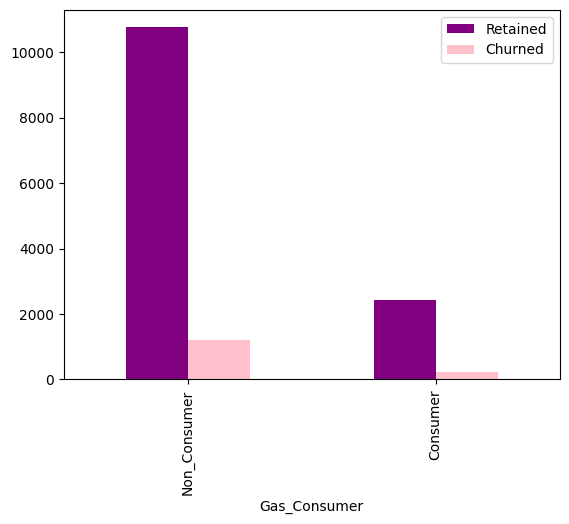

In [34]:
xscale = ['Non_Consumer', 'Consumer']
legend = ['Retained','Churned']
pd.crosstab(client['has_gas'] , client['churn']).plot(kind='bar' , color = ['purple','pink'])
plt.xlabel("Gas_Consumer")
plt.xticks(range(len(xscale)) , xscale)
plt.legend(legend)
plt.show()

In [35]:
print(len(client_churn))
print((client_churn['has_gas']== 't').sum())

1419
217


In [36]:
(((client_retain['has_gas'] == 'f').sum()) - ((client_retain['has_gas']== 't').sum())) / (client_retain['has_gas']== 't').sum() * 100

341.78307313064914

### Insights
* Only about **18%** of the customers have gas connection 
* Among the total of **1419** customers who churned , approximately **15.3%** of them do not have a gas connection
* The number of customers who have retained their service and do not own a gas connection is significantly higher compared to those who have a gas connection. Specifically, the former group exceeds the latter by a substantial margin of **342%**

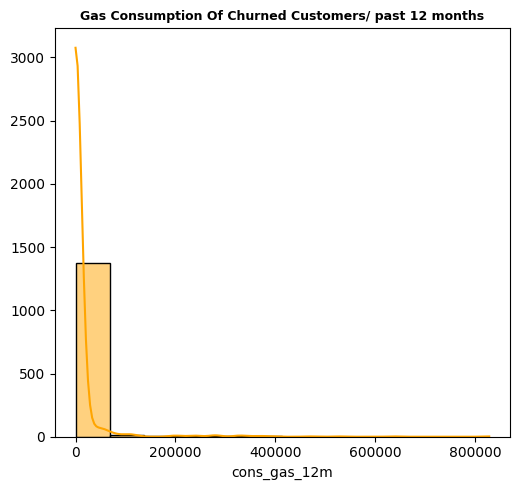

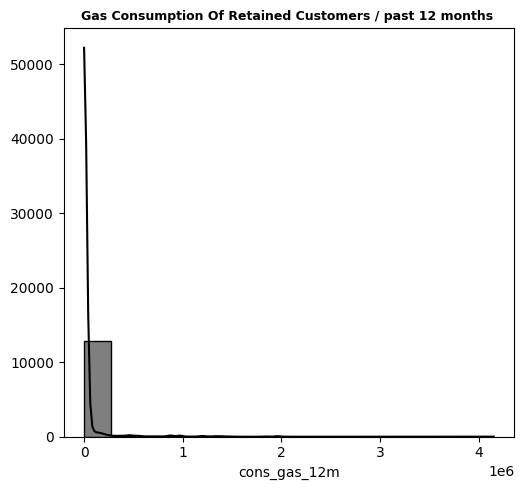

In [37]:
# Gas consumption based on customers 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=client_churn,x='cons_gas_12m',kde=True , color = 'orange')
plt.title('Gas Consumption Of Churned Customers/ past 12 months' , fontsize = 9 , fontweight = 'bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
sns.histplot(data=client_retain,x='cons_gas_12m',kde=True , color = 'black')
plt.title('Gas Consumption Of Retained Customers / past 12 months ', fontsize = 9 , fontweight = 'bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [62]:
def custom_provided_plotdistribution(column, ax, bins_=50):
    temp = pd.DataFrame({"Retention": client_retain[column],"Churn":client_churn[column]})
    temp[["Churn","Retention"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True,color=['#1f77b4', '#ff7f0e'], alpha=0.8)
    ax.set_xlabel(column)
    ax.set_facecolor('#f2f2f2') 
    ax.grid(color='white', linestyle='-', linewidth =0.7, zorder=0)
    ax.ticklabel_format(style='plain', axis='x')

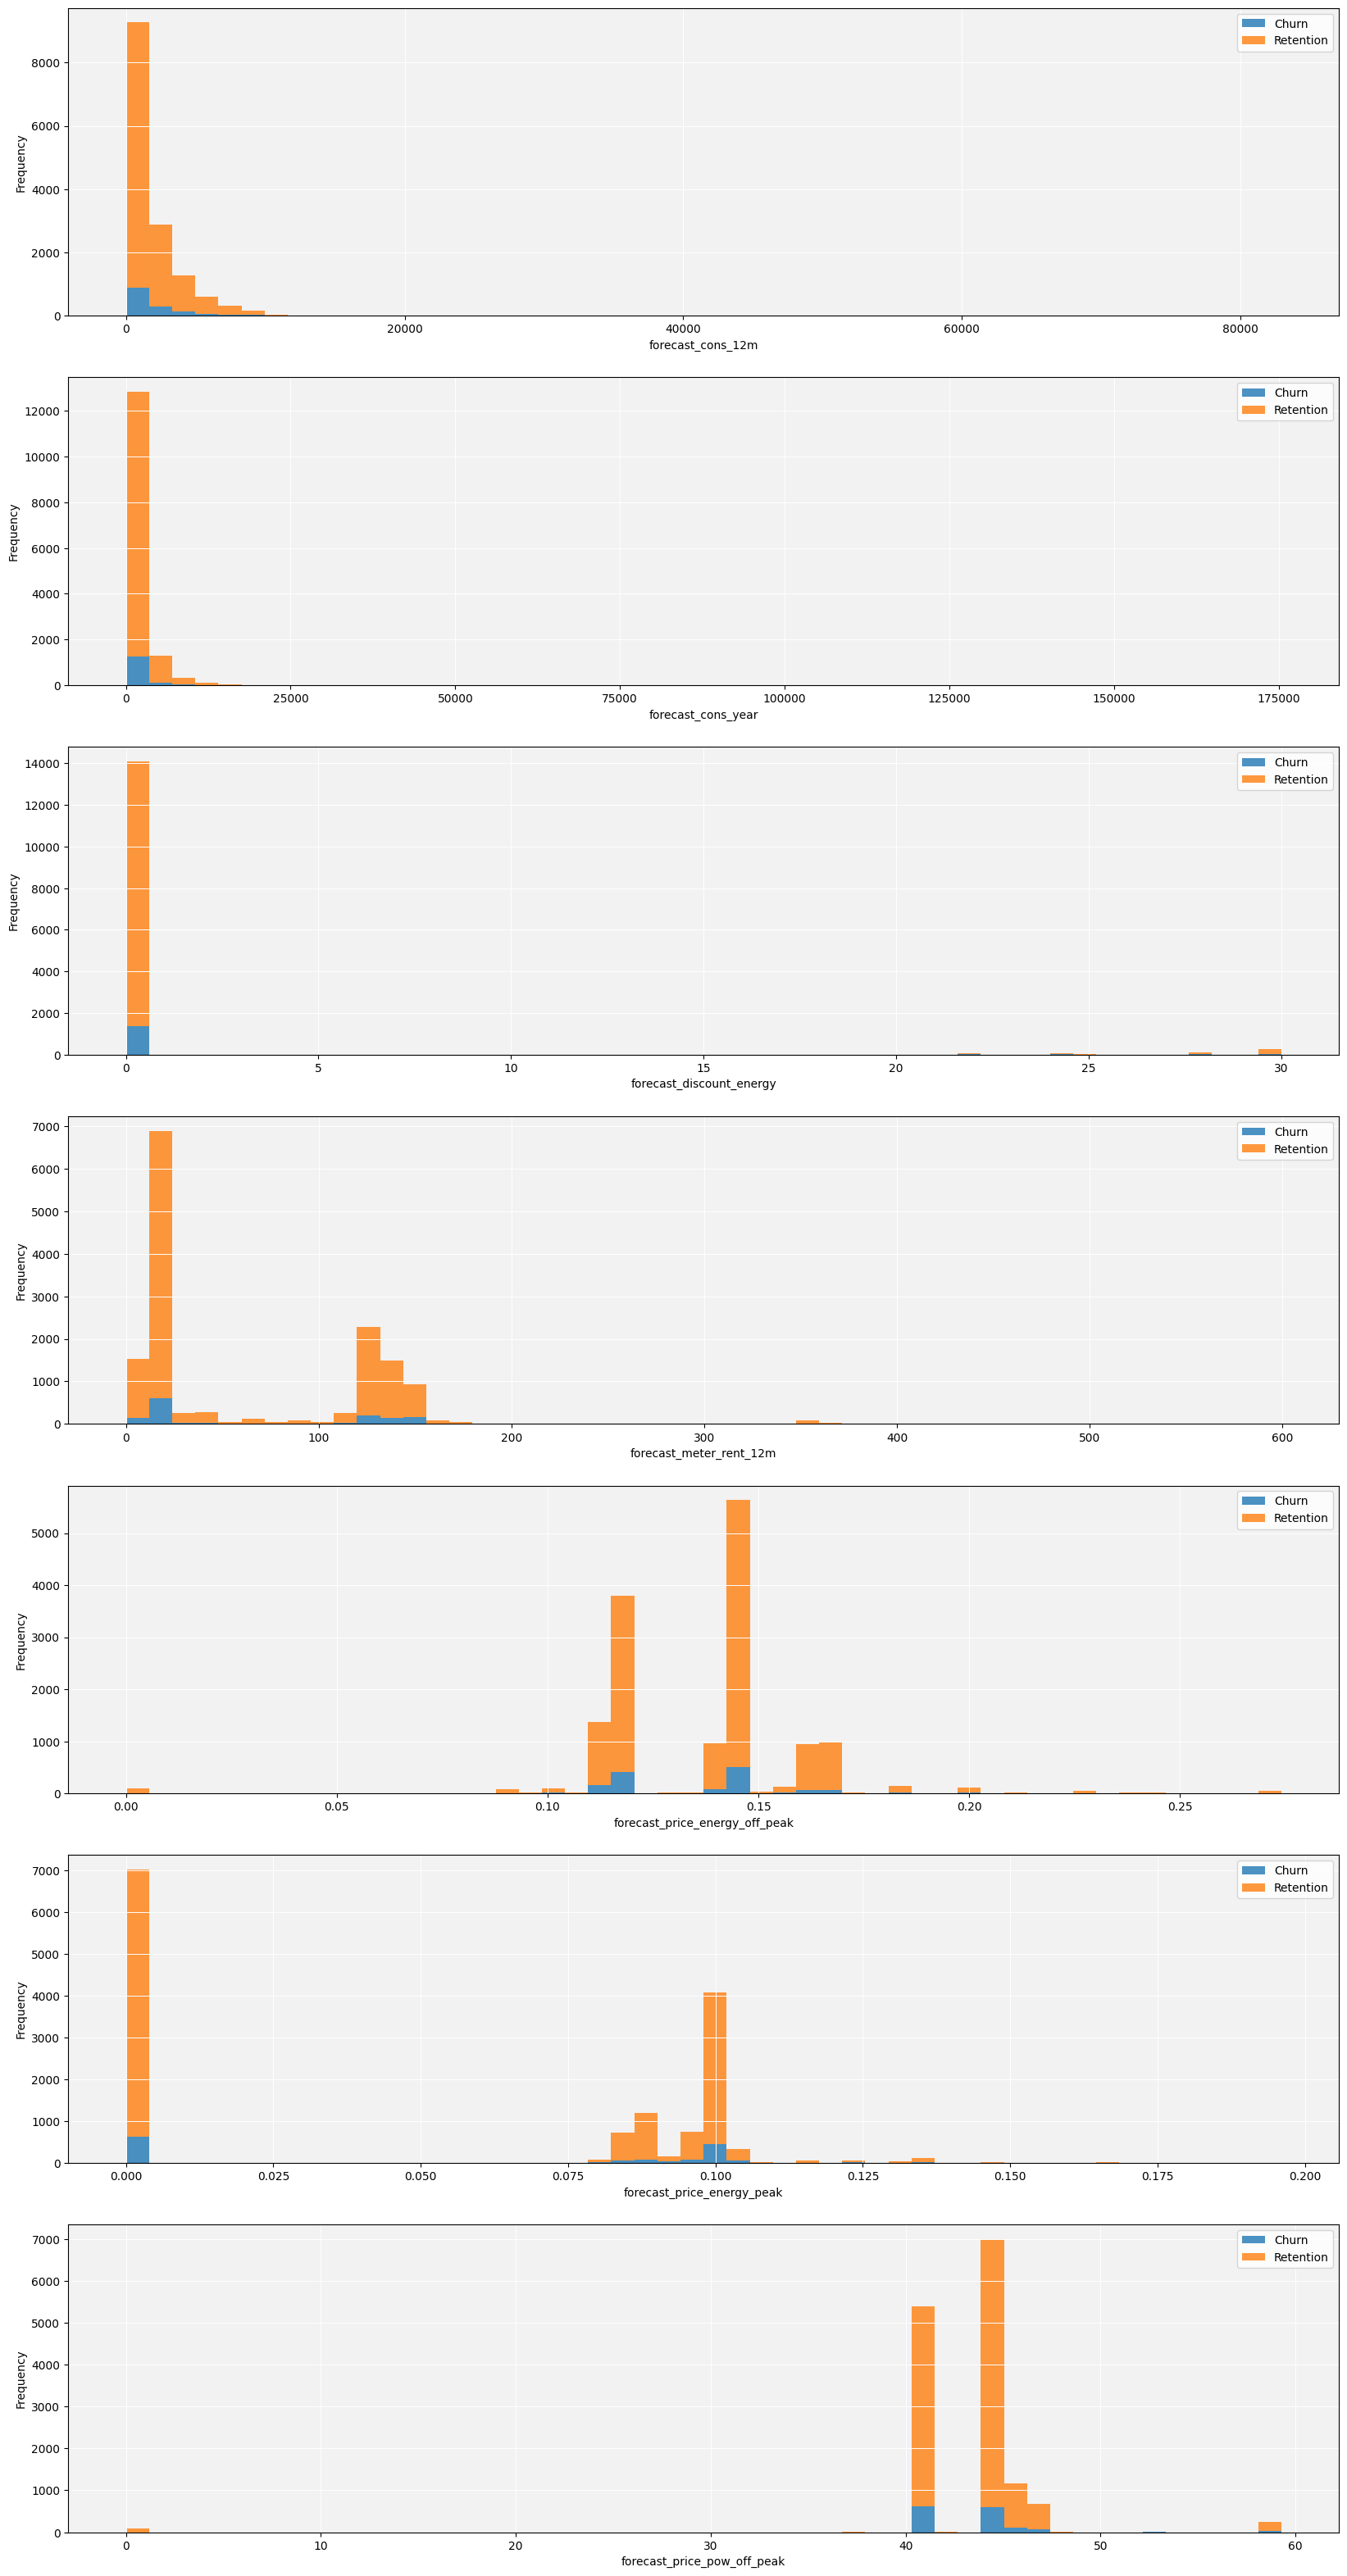

In [63]:
# forecast variables from our client dataframe
fig, ax = plt.subplots(nrows=7, figsize=(20,40))

custom_provided_plotdistribution("forecast_cons_12m", ax[0])
custom_provided_plotdistribution("forecast_cons_year", ax[1])
custom_provided_plotdistribution("forecast_discount_energy", ax[2])
custom_provided_plotdistribution("forecast_meter_rent_12m", ax[3])
custom_provided_plotdistribution("forecast_price_energy_off_peak", ax[4])
custom_provided_plotdistribution("forecast_price_energy_peak", ax[5])
custom_provided_plotdistribution("forecast_price_pow_off_peak", ax[6])

## Price !

In [68]:
price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [69]:
price.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [70]:
# Measuring Price Change
price_change = pd.DataFrame()

price_change['off-peak|to|peak'] = price['price_off_peak_var'] - price['price_peak_var']
price_change['peak|to|mid-peak'] = price['price_peak_var'] - price['price_mid_peak_var']
price_change['off_peak|to|mid_peak'] = price['price_off_peak_var'] - price['price_mid_peak_var']

In [71]:
price_change.head()

,off-peak|to|peak,peak|to|mid-peak,off_peak|to|mid_peak
0,0.151367,0.0,0.151367
1,0.151367,0.0,0.151367
2,0.151367,0.0,0.151367
3,0.149626,0.0,0.149626
4,0.149626,0.0,0.149626


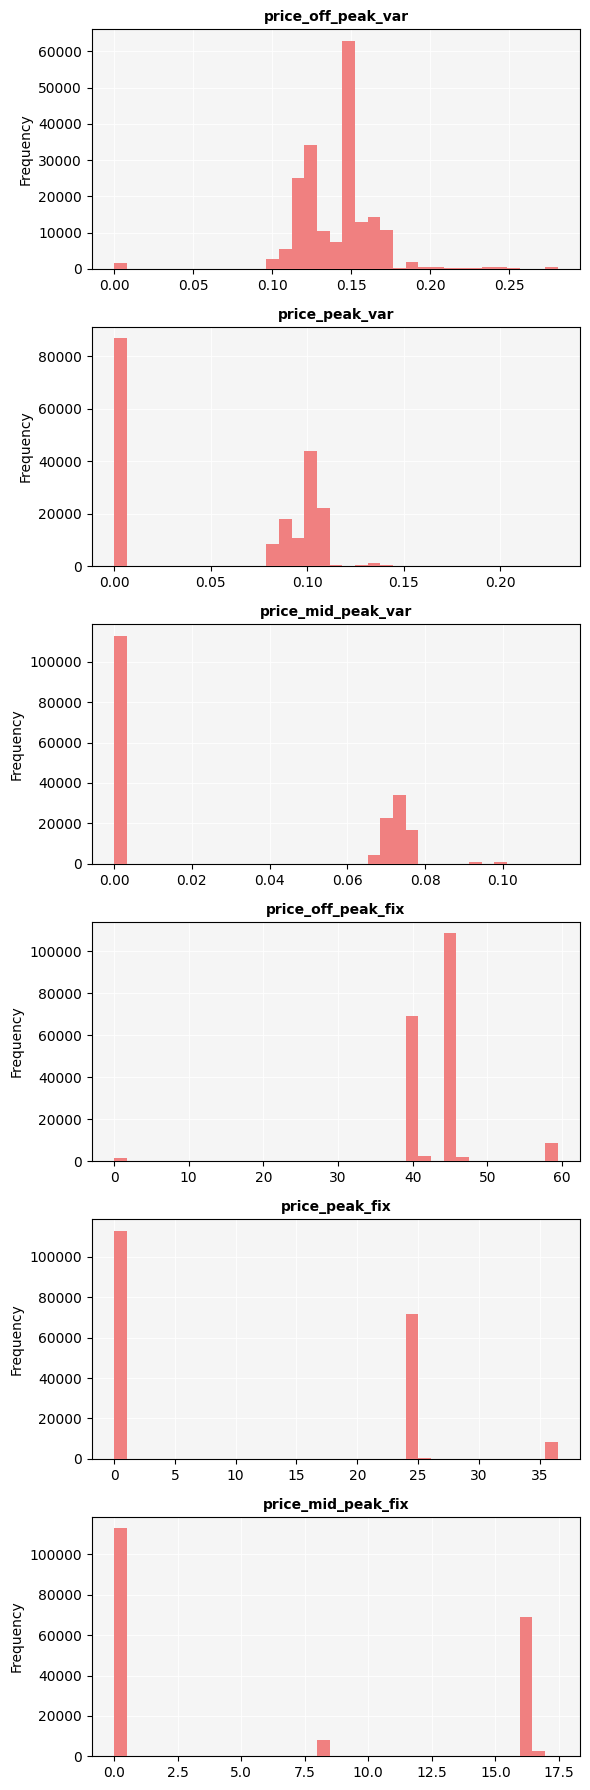

In [99]:
fig, axes = plt.subplots(6, 1, figsize=(6, 18))
cols=['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix',
      'price_mid_peak_fix']
for i, column in enumerate(cols):
    ax = axes[i]
    ax.set_facecolor('#f5f5f5')
    ax.grid(color='white', linestyle='-', linewidth=0.6)
    ax.hist(price[column], bins=35 , color = 'lightcoral' , zorder = 5)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')  
    ax.set_title(column ,fontweight = 'bold', fontsize=10)
plt.tight_layout()
plt.show()

<span style ="font-size:15px;">After measuring price changes between three periods & plotting histograms for all the prices , it is safe to draw a conclusion that only Price of energy for the *first period* (**off-peak**) have very **few zero prices** compared to the rest , hence only this column is suitable for determining price sensitivity</span>